# Statistical Analysis


## 1. Chi-square Test
The chi-Square test give information just for categorical variables. Its main fuction to check the difference between the categorical values on the basis of columns uding **"Contingency table"**. 
The `CONTINGENCY TABLE` give information relationship between the categorical variables. 
So we not to check the normal distribution and not the data distribution.

#### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as stats
import matplotlib as plt

### Load the titanic dataset

In [2]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


`Null Hypothesis:` There is no significant association between gender (sex) and survival ('survived') on the titanic,. This means any observed differences in survival rates between genders in the dataset are due to chance and not due to an underlying relationship

`Alternative Hypothesis:` There is a significant association between gender ('sex') and survival ('survived') on the titanic,. This means any observed differences in survival rates between genders in the dataset are due to chance and not due to an underlying relationship

### Create a Contingency table

In [3]:
contingency_table = pd.crosstab(df['sex'], df['survived'])
contingency_table

survived,0,1
sex,,
female,81,233
male,468,109


###     perform chi-square test

In [4]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print("Chi-squared Test Results:",chi2)
print("------------------------")
print('p-value:', p)
print("------------------------")
print("Degrees of Freedom:", dof)
print("------------------------")
print("Expected Frequencies:\n", expected)


Chi-squared Test Results: 260.71702016732104
------------------------
p-value: 1.1973570627755645e-58
------------------------
Degrees of Freedom: 1
------------------------
Expected Frequencies:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


As the P-value is this test is `p-value: 1.1973570627755645e-58` which is far less than `0.05`, we reject the null hypothesis.

## 2. Normal Distribution Test

For check the normal distributionn we check the numerical data. And many ways to check the normal distribution so we use the garphical method

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

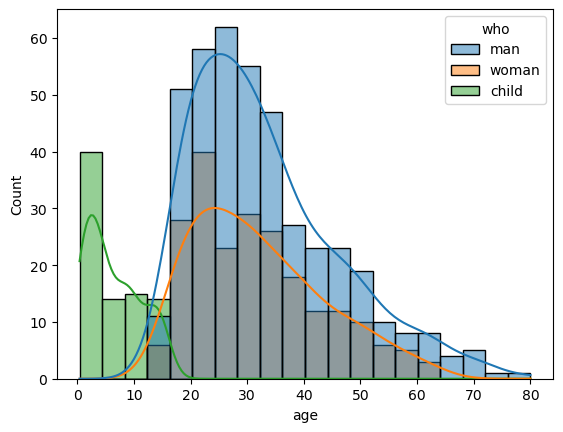

In [6]:
# garphical method
sns.histplot(data=df, x='age', hue= 'who', kde=True)

#### Shabiro wilk Test on Normal Distribution Gaussian Distribution
#### `Null Hypothesis:` The data is normaly distributed
#### `Alternative Hypothesis:` The data is not distributed

In [7]:
from scipy import stats

# Example usage
statistic, p = stats.shapiro(df['age'])
# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')


p-value: nan, Sample does not look Gaussian/Normally Distributed (reject H0)


In [8]:
# shapiro Wilk Test 
statistic, p = stats.shapiro(df['fare'])
# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')



p-value: 1.0840444395829658e-43, Sample does not look Gaussian/Normally Distributed (reject H0)


<Axes: xlabel='fare', ylabel='Count'>

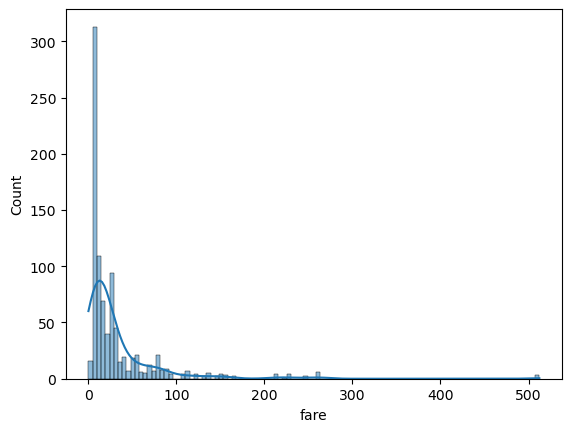

In [9]:
sns.histplot(data=df, x='fare', kde=True)

---------------------------

## t-Test

Choosing between a Z-test and a T-test for hypothesis testing depends primarily on two factors: the sample size and whether the population standard deviation is known.

## Z-test:
When to Use:

The population standard deviation is known.
The sample size is large (commonly, n ≥ 30). With large samples, the sample standard deviation approximates the population standard deviation.
For proportions (e.g., testing the proportion of success in a sample against a known population proportion).
Characteristics:

Based on the Z-distribution, which is a normal distribution as n becomes large.
More commonly used in quality control and standardization processes.
## T-test:
When to Use:

The population standard deviation is unknown.
The sample size is small (typically, n < 30).
Suitable for cases where the data is approximately normally distributed, especially in small samples.
Characteristics:

Based on the T-distribution, which accounts for the additional uncertainty due to the estimation of the population standard deviation from the sample.
T-distribution becomes closer to the normal distribution as the sample size increases.

## General Guidelines:
**Large Samples:** With large sample sizes, the T-test and Z-test will give similar results. This is because the T-distribution approaches the normal distribution as the sample size increases.

**Small Samples:** When the sample size is small and the population standard deviation is unknown, the T-test is generally the appropriate choice due to its ability to account for the uncertainty in the standard deviation estimate.
Unknown Population Standard Deviation: Even with large samples, if the population standard deviation is unknown and cannot be reliably estimated, a T-test is usually preferred.

**Conclusion:**
Use the Z-test for large sample sizes or when the population standard deviation is known.
Use the T-test for small sample sizes or when the population standard deviation is unknown.
In practice, the T-test is more commonly used in many research scenarios due to the rarity of knowing the population standard deviation and often dealing with smaller sample sizes.

Ham is notebook main t-test dekhen gay.

1. One sample T-Test

In [17]:
import scipy.stats as stats

# sample data
x = [1, 2, 3, 4, 5]

# known population mean
mu = 4

# perform one sample t-test
t_statistic, p = stats.ttest_1samp(x, mu)

# print results
print('t-statistic:', t_statistic)
print('p-value:', p)

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample mean is equal to population mean (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample mean is not equal to population mean (reject H0)')


t-statistic: -1.414213562373095
p-value: 0.23019964108049873
p-value: 0.23019964108049873, Sample mean is equal to population mean (fail to reject H0)


2. Two-Sample T-Test(Independent)

In [11]:
import scipy.stats as stats

# sample data
group1 =[2.3,3.4,4.5,2.3,3.4]
group2 = [1.2,2.2,3.2,2.2,2.3]

#perform independent two sample t-test
t_statistic, p = stats.ttest_ind(group1, group2)
# print the results
print("T-statistic:", t_statistic)
print("P-value:", p)

if p > 0.05:
    print(f'p-value: {p}, group1 mean is equal to group2 mean (fail to reject H0)')
else:
    print(f'p-value: {p}, group1 mean is not equal to group2 mean (reject H0)')

T-statistic: 1.8482055087756457
P-value: 0.10175647371829193
p-value: 0.10175647371829193, group1 mean is equal to group2 mean (fail to reject H0)


3. Paired sample T-Test

In [12]:
# sample data
before  = [2,3,4,5,6]
after = [3,4,5,6,7]
# perform paired t-test
t_statistic, p = stats.ttest_rel(before, after)
# print the results
print("T-statistic:", t_statistic)
print("P-value:", p)
if p > 0.05:
    print(f'p-value: {p}, before mean is equal to after mean (fail to reject H0)')
else:
    print(f'p-value: {p}, before mean is not equal to after mean (reject H0)')

T-statistic: -inf
P-value: 0.0
p-value: 0.0, before mean is not equal to after mean (reject H0)


c:\Users\ibwr\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## Test for Homogeniety

1. Levene's Test
   
This test are use to check the variance in two group of samples    

In [14]:
import scipy.stats as stats

# Sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# Perform Levene's Test
w_stat, p_val = stats.levene(group1, group2)

print("w-statistic:", w_stat)
print("p-value:", p_val)

# print the results based on if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Variances are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Variances are not equal (reject H0)')

w-statistic: 0.44651162790697696
p-value: 0.5228039334796065
p-value: 0.5228039334796065, Variances are equal (fail to reject H0)


2. Bartlett's Test

In [15]:
import scipy.stats as stats

# Sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# Perform Bartlett's Test
t_stat, p_val = stats.bartlett(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# print the results using if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Variances are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Variances are not equal (reject H0)')

t-statistic: 0.24050679805097827
p-value: 0.6238403179343277
p-value: 0.6238403179343277, Variances are equal (fail to reject H0)


## ANOVA

Analysis of Variance

### 1. ONE-way ANOVA

In [16]:

import scipy.stats as stats

# Sample data

a = [2.3, 3.4, 4.5, 2.3, 3.4]
b = [11.2, 12.2, 13.2, 12.2, 12.3]
c = [22.3, 23.4, 24.5, 22.3, 23.4]

# perform one-way ANOVA
f_stat, p_val = stats.f_oneway(a, b, c)

# print the results base on if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Means are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Means are not equal (reject H0)')

p-value: 4.279979561060641e-13, Means are not equal (reject H0)
